In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import calendar as cld
import matplotlib.pyplot as plt
import matplotlib.colors
colors_land = plt.cm.terrain(np.linspace(0.25, 1, 256))
import proplot as pplt # New plot library (https://proplot.readthedocs.io/en/latest/)
pplt.rc['savefig.dpi'] = 300 # 1200 is too big! #https://proplot.readthedocs.io/en/latest/basics.html#Creating-figures
from scipy.stats import chi2
from numba import njit,prange
import matplotlib as mpl
mpl.rcParams['hatch.linewidth'] = 0.05  # previous pdf hatch linewidth
from matplotlib.dates import DateFormatter

from scipy.stats import linregress

In [2]:
normal_format = {'gridlinewidth':0.1, 'gridcolor':'gray8', 'gridalpha':0.5, 'coast':True,'borders':True ,'reso':'hi', 'labels':True,
                 'lonlines':2, 'latlines':2, 'abc':False, 'latlim':[43.,48.5],'lonlim':[4.,16.]}
multiplot_format = {'gridlinewidth':0.1, 'gridcolor':'gray8', 'gridalpha':0.5, 'coast':True,'borders':True ,'reso':'hi', 'labels':False,
                    'lonlines':2, 'latlines':2, 'abc':False, 'latlim':[43.,48.5],'lonlim':[4.,16.]}

imin = 32 ; imax = -30
jmin = 20 ; jmax = -15
ds = xr.open_dataset('/bettik/beaumetj/MARout/MAR-ERA-20C/MARgrid_EUf.nc')
lon = ds.LON[jmin:jmax,imin:imax]
lat = ds.LAT[jmin:jmax,imin:imax]
H = np.array(ds.SH[jmin:jmax,imin:imax])

In [3]:
wp_meanseason_meanT = np.load('/bettik/castelli/data/saved_data_MAR_ECEarth3/wp_meanseason_meanT.npy')[:,:,jmin:jmax,imin:imax]
wp_meanseason_meanT_hist = wp_meanseason_meanT[:54,:,:,:]
wp_meanseason_meanT_fut = wp_meanseason_meanT[55:,:,:,:]

wp_meanseason_meanT_50m = np.load('/bettik/castelli/data/saved_data_MAR_ECEarth3/wp_meanseason_meanT_50m.npy')[:,:,jmin:jmax,imin:imax]
wp_meanseason_meanT_50m_hist = wp_meanseason_meanT_50m[:54,:,:,:]
wp_meanseason_meanT_50m_fut = wp_meanseason_meanT_50m[55:,:,:,:]

wp_meanseason_meanT_100m = np.load('/bettik/castelli/data/saved_data_MAR_ECEarth3/wp_meanseason_meanT_100m.npy')[:,:,jmin:jmax,imin:imax]
wp_meanseason_meanT_100m_hist = wp_meanseason_meanT_100m[:54,:,:,:]
wp_meanseason_meanT_100m_fut = wp_meanseason_meanT_100m[55:,:,:,:]

In [4]:
hist = [wp_meanseason_meanT_hist,wp_meanseason_meanT_50m_hist,wp_meanseason_meanT_100m_hist]
fut = [wp_meanseason_meanT_fut,wp_meanseason_meanT_50m_fut,wp_meanseason_meanT_100m_fut]

# 3 heights, 4 seasons, 91x139 pixels
origin_T_hist=np.full((3,4,91,139),np.nan)
slope_T_hist=np.full((3,4,91,139),np.nan)
pvalue_T_hist=np.full((3,4,91,139),np.nan)

origin_T_fut=np.full((3,4,91,139),np.nan)
slope_T_fut=np.full((3,4,91,139),np.nan)
pvalue_T_fut=np.full((3,4,91,139),np.nan)

for i in range(wp_meanseason_meanT.shape[3]):
    # print(str(lon)+'/'+str(les_season_maxT.shape[3]),end=' ')
    for j in range(wp_meanseason_meanT.shape[2]):
        for season in range(4):
            for h in range(0,3):
                # h for height : 2m, 50m or 100m
                linregress_T_hist = linregress(np.arange(hist[h].shape[0]), hist[h][:,season,j,i])
                origin_T_hist[h][season][j][i] = linregress_T_hist.intercept
                slope_T_hist[h][season][j][i] = linregress_T_hist.slope
                pvalue_T_hist[h][season][j][i] = linregress_T_hist.pvalue
                
                linregress_T_fut = linregress(np.arange(fut[h].shape[0]), fut[h][:,season,j,i])
                origin_T_fut[h][season][j][i] = linregress_T_fut.intercept
                slope_T_fut[h][season][j][i] = linregress_T_fut.slope
                pvalue_T_fut[h][season][j][i] = linregress_T_fut.pvalue

In [5]:
def detect_alps(H):
    nlat,nlon = np.shape(H)
    mask = np.bool_(np.zeros((nlat,nlon)))
    r = 4
    for j in range(r,nlat-r):
        for i in range(r,nlon-r):
            mask[j,i] = np.logical_and(H[j,i]>360 ,np.any(H[j-r:j+r,i-r:i+r]>1300))
            # mask[j,i] = np.std(H[j-r:j+r,i-r:i+r])>200
    return mask
alps = detect_alps(H)
alps[lon<4.8] = False
alps[np.logical_and(lon>10,lat<45.2)] = False

north_alps = np.copy(alps)
north_alps[lon>8.6] = False
north_alps[lat<45] = False
#north_alps[lat>46.5] = False

south_alps = np.copy(alps)
south_alps[lat>45] = False

east_alps = np.copy(alps)
east_alps[lon<8.6] = False

In [6]:
ne_alps = np.copy(alps) # ne : north-east
ne_alps[lat<46.7] = False


nw_alps2 = np.copy(alps) # nw : north-west
nw_alps2[lon>7.9] = False
nw_alps2[lat<45.9] = False
nw_alps2[lat>46.7] = False

nw_alps3 = np.copy(alps) # nw : north-west
nw_alps3[lon>6.9] = False
nw_alps3[lat<44.8] = False
nw_alps3[lat>46.7] = False

nw_alps4 = np.copy(alps) # nw : north-west
nw_alps4[lon>8.3] = False
nw_alps4[lat<46.4] = False
nw_alps4[lat>46.7] = False

nw_alps5 = np.copy(alps) # nw : north-west
nw_alps5[lon>7.1] = False
nw_alps5[lat<45.2] = False
nw_alps5[lat>46.7] = False

nw_alps = np.logical_or(np.logical_or(np.logical_or(nw_alps2,nw_alps3),nw_alps4),nw_alps5)


s_alps = np.logical_and(alps,np.invert(np.logical_or(nw_alps,ne_alps)))

In [10]:
wp_meanseason_meanTTp = np.full((7,140,4,91,139),np.nan)

wp_meanseason_meanTTp[0] = np.load('/bettik/castelli/data/saved_data_MAR_ECEarth3/wp_meanseason_meanTTp_925.npy')[:,:,jmin:jmax,imin:imax]
wp_meanseason_meanTTp[1] = np.load('/bettik/castelli/data/saved_data_MAR_ECEarth3/wp_meanseason_meanTTp_850.npy')[:,:,jmin:jmax,imin:imax]
wp_meanseason_meanTTp[2] = np.load('/bettik/castelli/data/saved_data_MAR_ECEarth3/wp_meanseason_meanTTp_800.npy')[:,:,jmin:jmax,imin:imax]
wp_meanseason_meanTTp[3] = np.load('/bettik/castelli/data/saved_data_MAR_ECEarth3/wp_meanseason_meanTTp_700.npy')[:,:,jmin:jmax,imin:imax]
wp_meanseason_meanTTp[4] = np.load('/bettik/castelli/data/saved_data_MAR_ECEarth3/wp_meanseason_meanTTp_600.npy')[:,:,jmin:jmax,imin:imax]
wp_meanseason_meanTTp[5] = np.load('/bettik/castelli/data/saved_data_MAR_ECEarth3/wp_meanseason_meanTTp_500.npy')[:,:,jmin:jmax,imin:imax]
wp_meanseason_meanTTp[6] = np.load('/bettik/castelli/data/saved_data_MAR_ECEarth3/wp_meanseason_meanTTp_200.npy')[:,:,jmin:jmax,imin:imax]

In [11]:

origin_TTp_hist=np.full((7,4,91,139),np.nan)
slope_TTp_hist=np.full((7,4,91,139),np.nan)
pvalue_TTp_hist=np.full((7,4,91,139),np.nan)

origin_TTp_fut=np.full((7,4,91,139),np.nan)
slope_TTp_fut=np.full((7,4,91,139),np.nan)
pvalue_TTp_fut=np.full((7,4,91,139),np.nan)

# pressures = [925,850,800,700,600,500,200]

for i in range(139):
    # print(str(lon)+'/'+str(les_season_maxT.shape[3]),end=' ')
    print(i,end=' ')
    for j in range(91):
        for season in range(4):
            for P in range(7):
                linregress_T_hist = linregress(np.arange(54), wp_meanseason_meanTTp[P,:54,season,j,i]) #hist : 1961-2014, 54 years
                origin_TTp_hist[P][season][j][i] = linregress_T_hist.intercept
                slope_TTp_hist[P][season][j][i] = linregress_T_hist.slope
                pvalue_TTp_hist[P][season][j][i] = linregress_T_hist.pvalue
            
                linregress_T_fut = linregress(np.arange(85), wp_meanseason_meanTTp[P,55:,season,j,i]) #fut : 2015-2100, 85 years
                origin_TTp_fut[P][season][j][i] = linregress_T_fut.intercept
                slope_TTp_fut[P][season][j][i] = linregress_T_fut.slope
                pvalue_TTp_fut[P][season][j][i] = linregress_T_fut.pvalue

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 

In [12]:
wp_meanseason_meanSP = np.load('/bettik/castelli/data/saved_data_MAR_ECEarth3/wp_meanseason_meanSP.npy')[:,:,jmin:jmax,imin:imax]

wp_meanseason_meanSP.shape

(140, 4, 91, 139)

In [13]:
meanSP = wp_meanseason_meanSP.mean(axis=(0,1))
meanSP.shape

(91, 139)

In [14]:
alps_SP_925 = np.copy(alps)
alps_SP_850 = np.copy(alps)
alps_SP_800 = np.copy(alps)
alps_SP_700 = np.copy(alps)
alps_SP_600 = np.copy(alps)
alps_SP_500 = np.copy(alps)
alps_SP_200 = np.copy(alps)

alps_SP_925[meanSP>945] = False
alps_SP_925[meanSP<905] = False

alps_SP_850[meanSP>870] = False
alps_SP_850[meanSP<830] = False

alps_SP_800[meanSP>820] = False
alps_SP_800[meanSP<780] = False

alps_SP_700[meanSP>720] = False
alps_SP_700[meanSP<680] = False

alps_SP_600[meanSP>620] = False
alps_SP_600[meanSP<580] = False

alps_SP_500[meanSP>520] = False
alps_SP_500[meanSP<480] = False

alps_SP = [alps_SP_925,alps_SP_850,alps_SP_800,alps_SP_700,alps_SP_600,alps_SP_500,alps_SP_200]

In [15]:
# mask for under-the-surface values at 800hPa and other pressures

msk_925 = (wp_meanseason_meanTTp[0].mean(axis=0) < 1000) # 1000 :  arbitrary value, we just want to filter out the 10**(34) values
msk_850 = (wp_meanseason_meanTTp[1].mean(axis=0) < 1000)
msk_800 = (wp_meanseason_meanTTp[2].mean(axis=0) < 1000)
msk_700 = (wp_meanseason_meanTTp[3].mean(axis=0) < 1000)
msk_600 = (wp_meanseason_meanTTp[4].mean(axis=0) < 1000)
msk_500 = (wp_meanseason_meanTTp[5].mean(axis=0) < 1000)
msk_200 = (wp_meanseason_meanTTp[6].mean(axis=0) < 1000)



alps_TTp_925 = np.logical_and(alps,msk_925)
alps_TTp_850 = np.logical_and(alps,msk_850)
alps_TTp_800 = np.logical_and(alps,msk_800)
alps_TTp_700 = np.logical_and(alps,msk_700)
alps_TTp_600 = np.logical_and(alps,msk_600)
alps_TTp_500 = np.logical_and(alps,msk_500)
alps_TTp_200 = np.logical_and(alps,msk_200)

alps_TTp = [alps_TTp_925,alps_TTp_850,alps_TTp_800,alps_TTp_700,alps_TTp_600,alps_TTp_500,alps_TTp_200]

In [16]:
# generalize mask to whole period

alps_wp = np.repeat(alps[np.newaxis,:,:],4,axis=0)
alps_wp = np.repeat(alps_wp[np.newaxis,:,:,:],140,axis=0)
alps_wp.shape

(140, 4, 91, 139)

In [17]:

msk_925_wp = np.repeat(msk_925[np.newaxis,:,:,:],140,axis=0)
msk_850_wp = np.repeat(msk_850[np.newaxis,:,:,:],140,axis=0)
msk_800_wp = np.repeat(msk_800[np.newaxis,:,:,:],140,axis=0)
msk_700_wp = np.repeat(msk_700[np.newaxis,:,:,:],140,axis=0)
msk_600_wp = np.repeat(msk_600[np.newaxis,:,:,:],140,axis=0)
msk_500_wp = np.repeat(msk_500[np.newaxis,:,:,:],140,axis=0)
msk_200_wp = np.repeat(msk_200[np.newaxis,:,:,:],140,axis=0)

In [18]:
alps_925_wp = np.logical_and(alps_wp,msk_925_wp)
alps_850_wp = np.logical_and(alps_wp,msk_850_wp)
alps_800_wp = np.logical_and(alps_wp,msk_800_wp)
alps_700_wp = np.logical_and(alps_wp,msk_700_wp)
alps_600_wp = np.logical_and(alps_wp,msk_600_wp)
alps_500_wp = np.logical_and(alps_wp,msk_500_wp)
alps_200_wp = np.logical_and(alps_wp,msk_200_wp)

In [19]:
# sur les Alpes

wp_meanseason_meanTTp_925_alps = np.ma.array(wp_meanseason_meanTTp[0],mask=np.invert(alps_925_wp))
wp_meanseason_meanTTp_850_alps = np.ma.array(wp_meanseason_meanTTp[1],mask=np.invert(alps_850_wp))
wp_meanseason_meanTTp_800_alps = np.ma.array(wp_meanseason_meanTTp[2],mask=np.invert(alps_800_wp))
wp_meanseason_meanTTp_700_alps = np.ma.array(wp_meanseason_meanTTp[3],mask=np.invert(alps_700_wp))
wp_meanseason_meanTTp_600_alps = np.ma.array(wp_meanseason_meanTTp[4],mask=np.invert(alps_600_wp))
wp_meanseason_meanTTp_500_alps = np.ma.array(wp_meanseason_meanTTp[5],mask=np.invert(alps_500_wp))
wp_meanseason_meanTTp_200_alps = np.ma.array(wp_meanseason_meanTTp[6],mask=np.invert(alps_200_wp))


wp_meanseason_meanTTp_925_meanalps = wp_meanseason_meanTTp_925_alps.mean(axis=(2,3))
wp_meanseason_meanTTp_850_meanalps = wp_meanseason_meanTTp_850_alps.mean(axis=(2,3))
wp_meanseason_meanTTp_800_meanalps = wp_meanseason_meanTTp_800_alps.mean(axis=(2,3))
wp_meanseason_meanTTp_700_meanalps = wp_meanseason_meanTTp_700_alps.mean(axis=(2,3))
wp_meanseason_meanTTp_600_meanalps = wp_meanseason_meanTTp_600_alps.mean(axis=(2,3))
wp_meanseason_meanTTp_500_meanalps = wp_meanseason_meanTTp_500_alps.mean(axis=(2,3))
wp_meanseason_meanTTp_200_meanalps = wp_meanseason_meanTTp_200_alps.mean(axis=(2,3))

/tmp/ipykernel_1613319/3648689953.py:14: ProplotWarning: Calling arbitrary axes methods from SubplotGrid was deprecated in v0.8 and will be removed in a future release. Please index the grid or loop over the grid instead.
  axs.legend()


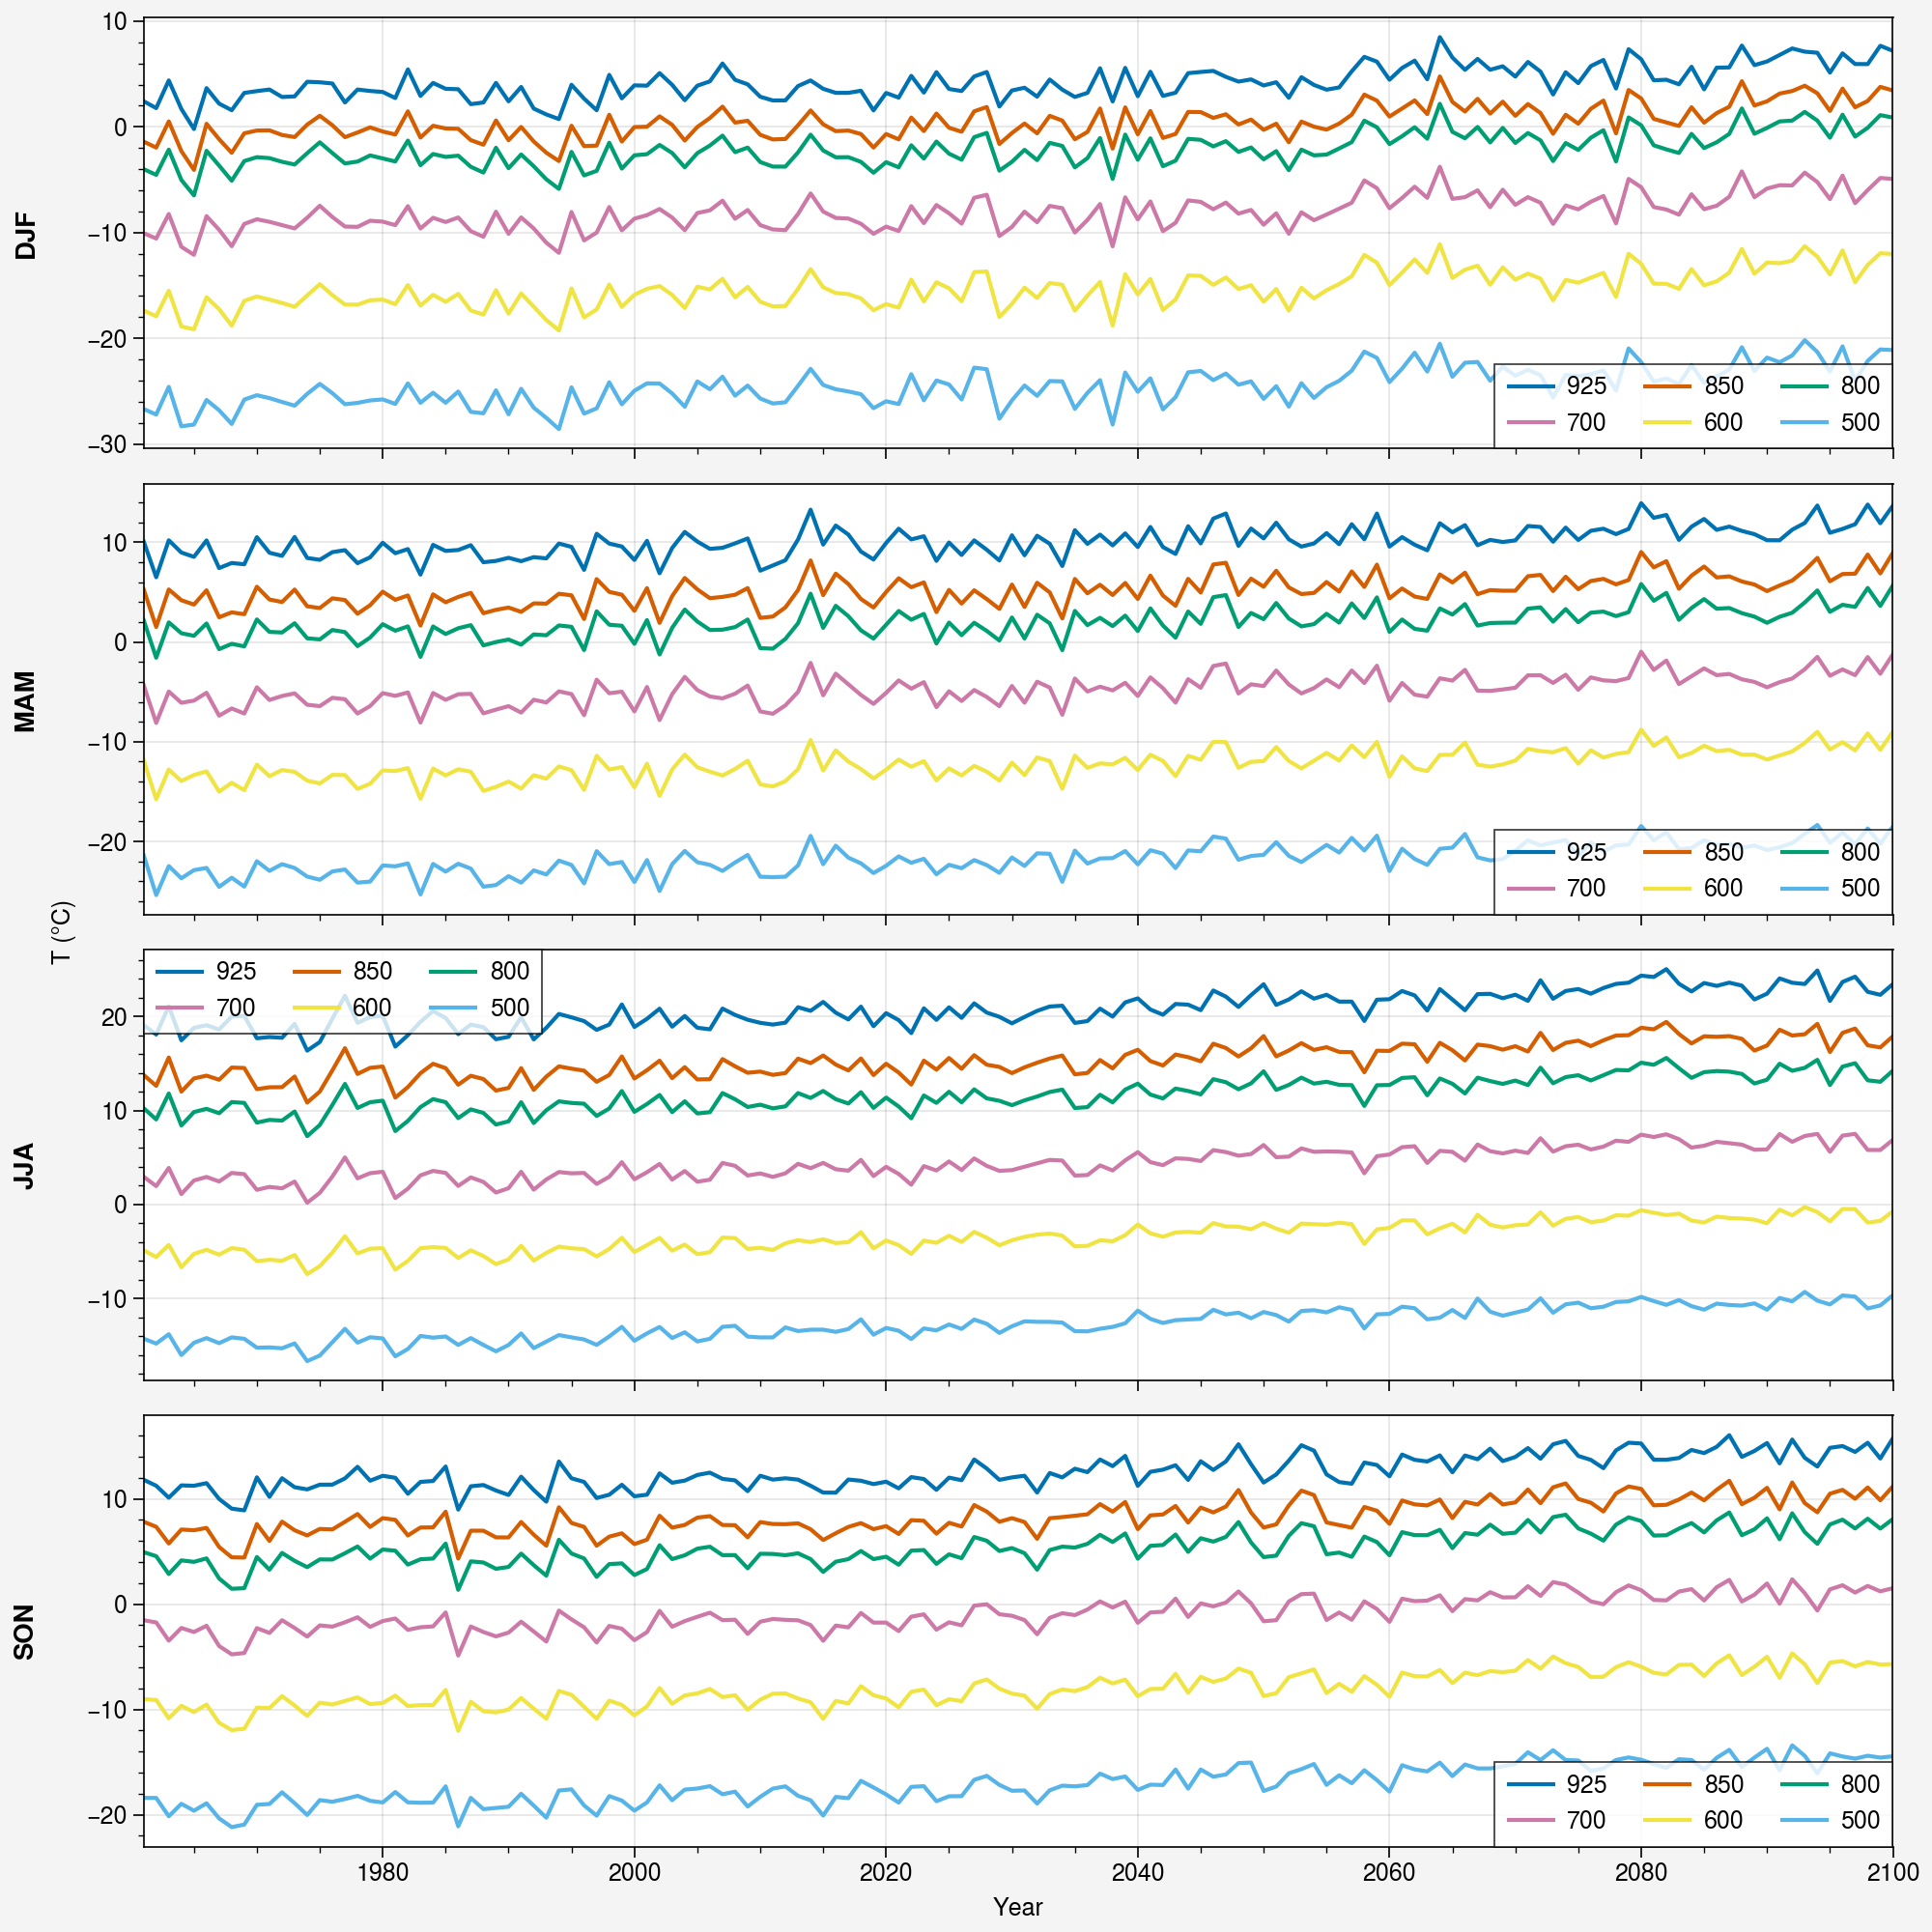

In [20]:
f,axs = pplt.subplots(nrows=4,figsize=(10,10))

for season in range(4):
    ax = axs[season]
    ax.plot(np.arange(1961,2101),wp_meanseason_meanTTp_925_meanalps[:,season],label='925')
    ax.plot(np.arange(1961,2101),wp_meanseason_meanTTp_850_meanalps[:,season],label='850')
    ax.plot(np.arange(1961,2101),wp_meanseason_meanTTp_800_meanalps[:,season],label='800')
    ax.plot(np.arange(1961,2101),wp_meanseason_meanTTp_700_meanalps[:,season],label='700')
    ax.plot(np.arange(1961,2101),wp_meanseason_meanTTp_600_meanalps[:,season],label='600')
    ax.plot(np.arange(1961,2101),wp_meanseason_meanTTp_500_meanalps[:,season],label='500')
#    ax.plot(np.arange(1961,2101),wp_meanseason_meanTTp_200_meanalps[:,season],label='200')
#    ax.set_ylim((-7,16))

axs.legend()
axs.format(rowlabels=['DJF','MAM','JJA', 'SON'],xlabel='Year',ylabel='T (°C)')

Altitude levels

In [21]:
levels = [np.logical_and(alps,H<1000) , 
               np.logical_and(alps,np.logical_and(H>=1000,H<1500)),
               np.logical_and(alps,np.logical_and(H>=1500,H<2000)),
               np.logical_and(alps,np.logical_and(H>=2000,H<2500)),
               np.logical_and(alps,H>=2500),
         alps]
name_levels = ["< 1000","1000-1500","1500-2000","2000-2500","> 2500","all"]
surface_levels = np.array([np.sum(lev) for lev in levels])
frac_levels = np.array([np.sum(lev)/np.sum(alps) for lev in levels])
color_levels = [colors_land[0],colors_land[50],colors_land[100],colors_land[180],np.array([0.8,0.8,0.8,1.]),np.array([0.,0.,0.,1.]) ]
def print_rgb(rgb):
    print(rgb,end=' ')
    print(str(int(rgb[0]*255))+';'+str(int(rgb[1]*255))+';'+str(int(rgb[2]*255)),end=' ')
    print('\x1b[38;2;'+str(int(rgb[0]*255))+';'+str(int(rgb[1]*255))+';'+str(int(rgb[2]*255))+'m'+'██████'+'\x1b[0m')
for c in color_levels:
    print_rgb(c)

[0.00392157 0.80078431 0.40078431 1.        ] 1;204;102 ██████
[0.58431373 0.91686275 0.51686275 1.        ] 149;233;131 ██████
[0.90980392 0.88454902 0.55129412 1.        ] 232;225;140 ██████
[0.56078431 0.43780392 0.41145098 1.        ] 143;111;104 ██████
[0.8 0.8 0.8 1. ] 204;204;204 ██████
[0. 0. 0. 1.] 0;0;0 ██████


/home/castelli/miniforge3/envs/phd_v1/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:403: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "


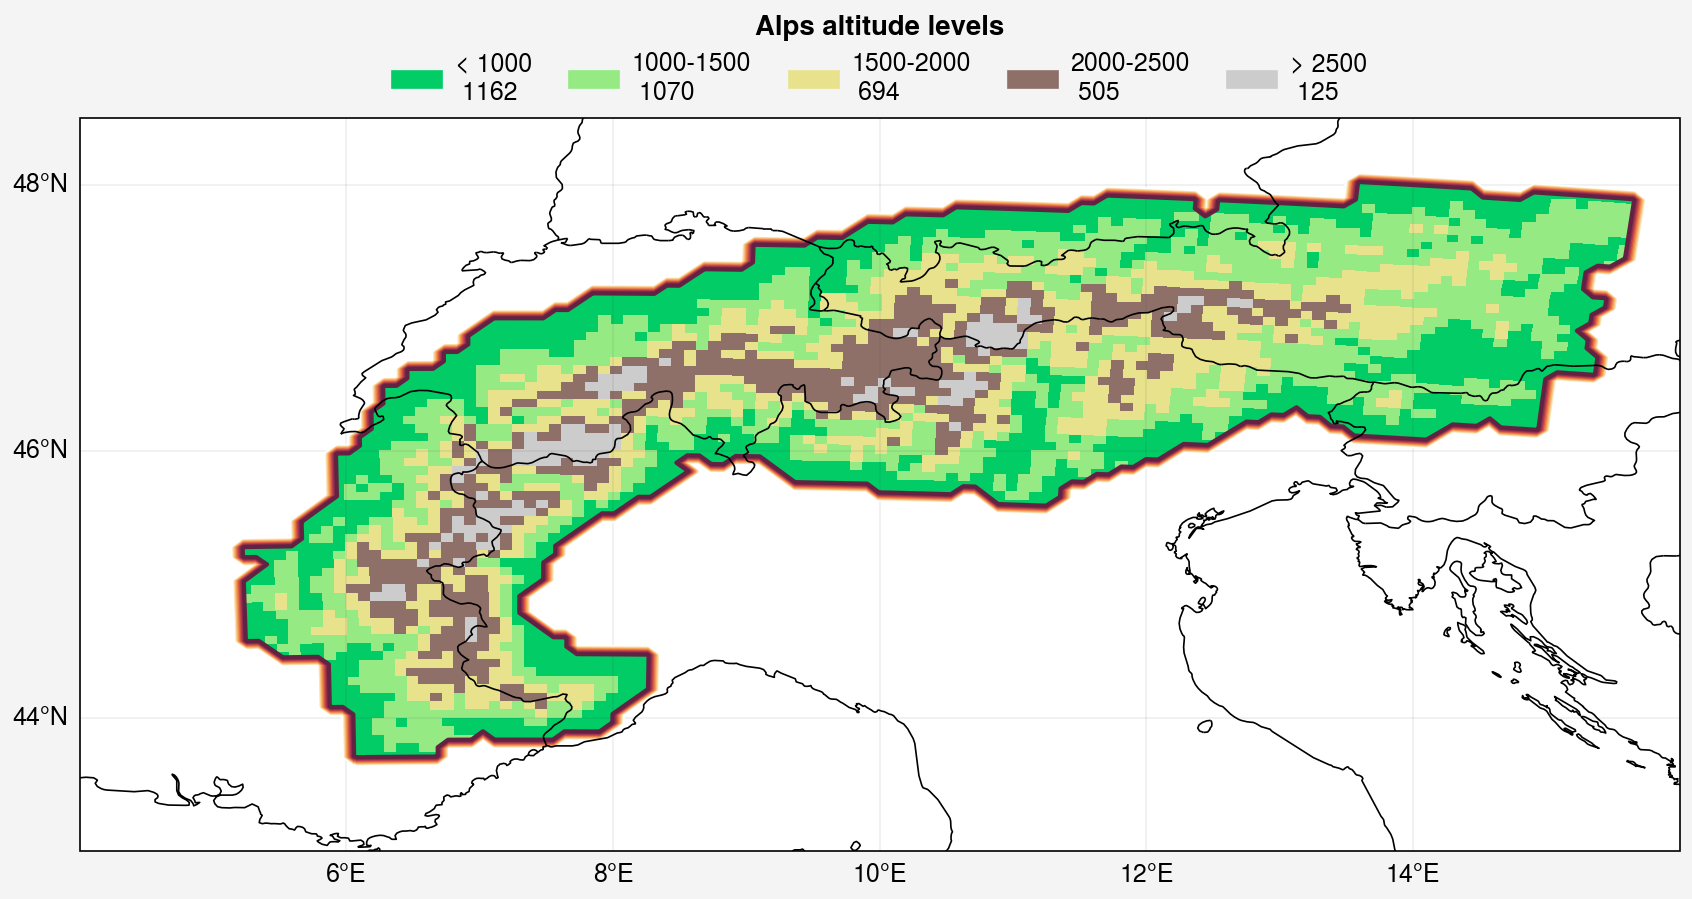

In [22]:
f, ax = pplt.subplots(proj='cyl', axwidth=8)
for i,lev in enumerate(levels[:-1]):
    ax.pcolormesh(lon, lat,np.ma.masked_array(lev,mask=np.logical_not(lev)) ,cmap=matplotlib.colors.ListedColormap([color_levels[i]]),
                  edgecolors='none')
ax.contour(lon, lat,alps)
ax.format(**normal_format,suptitle='Alps altitude levels')
import matplotlib.patches as mpatches
ax.legend(handles=
          [ mpatches.Patch(color=color_levels[i],label=name_levels[i]+'\n {:}'.format(np.sum(levels[i]))) for i in range(5)],
          fontsize=15, ncols=5, center=True, frame=False, loc='t')

In [23]:
levels_wp = [np.logical_and(alps_wp,H<1000) , 
               np.logical_and(alps_wp,np.logical_and(H>=1000,H<1500)),
               np.logical_and(alps_wp,np.logical_and(H>=1500,H<2000)),
               np.logical_and(alps_wp,np.logical_and(H>=2000,H<2500)),
               np.logical_and(alps_wp,H>=2500),
         alps_wp]

meanseason_meanT_levels = [np.ma.masked_array(wp_meanseason_meanT,mask=np.invert(levels_wp[0])).mean(axis=(2,3)),
                           np.ma.masked_array(wp_meanseason_meanT,mask=np.invert(levels_wp[1])).mean(axis=(2,3)),
                           np.ma.masked_array(wp_meanseason_meanT,mask=np.invert(levels_wp[2])).mean(axis=(2,3)),
                           np.ma.masked_array(wp_meanseason_meanT,mask=np.invert(levels_wp[3])).mean(axis=(2,3)),
                           np.ma.masked_array(wp_meanseason_meanT,mask=np.invert(levels_wp[4])).mean(axis=(2,3)),
                           np.ma.masked_array(wp_meanseason_meanT,mask=np.invert(levels_wp[5])).mean(axis=(2,3))]

meanseason_meanT_100m_levels = [np.ma.masked_array(wp_meanseason_meanT_100m,mask=np.invert(levels_wp[0])).mean(axis=(2,3)),
                           np.ma.masked_array(wp_meanseason_meanT_100m,mask=np.invert(levels_wp[1])).mean(axis=(2,3)),
                           np.ma.masked_array(wp_meanseason_meanT_100m,mask=np.invert(levels_wp[2])).mean(axis=(2,3)),
                           np.ma.masked_array(wp_meanseason_meanT_100m,mask=np.invert(levels_wp[3])).mean(axis=(2,3)),
                           np.ma.masked_array(wp_meanseason_meanT_100m,mask=np.invert(levels_wp[4])).mean(axis=(2,3)),
                           np.ma.masked_array(wp_meanseason_meanT_100m,mask=np.invert(levels_wp[5])).mean(axis=(2,3))]

seasons = ['DJF','MAM','JJA','SON']

time = np.arange(1961,2101)

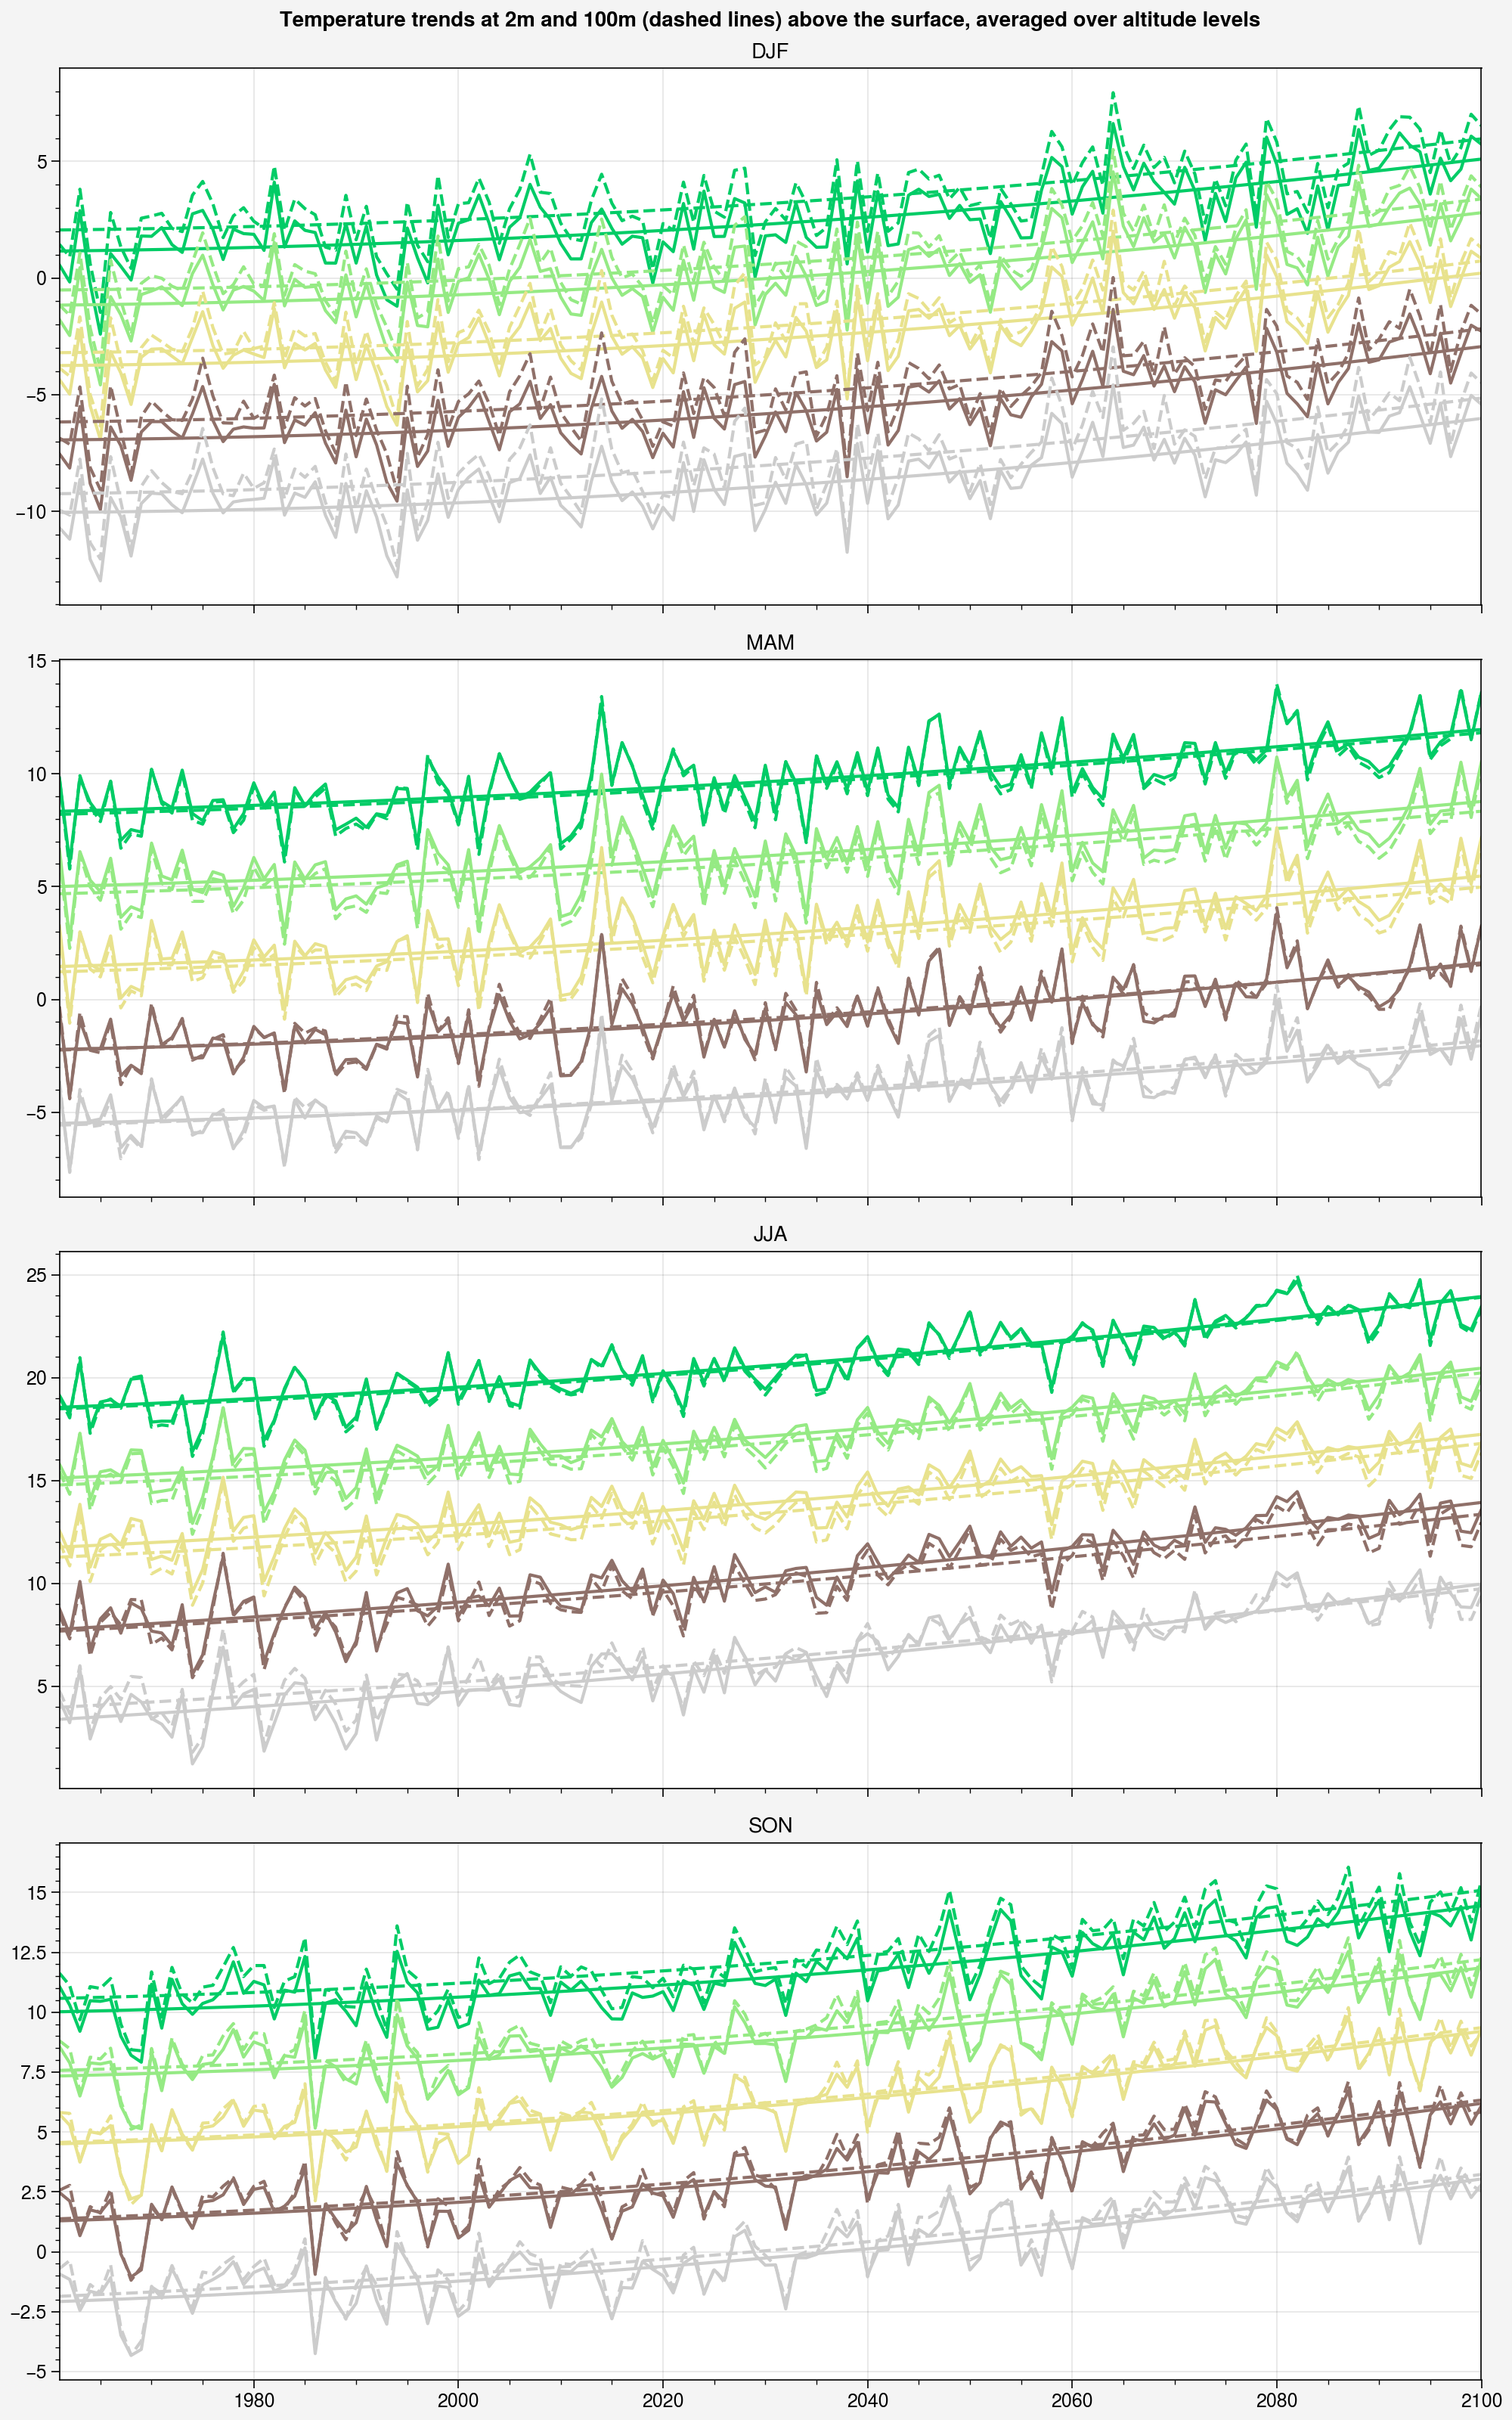

In [24]:

f,axs = pplt.subplots(nrows=4,figsize=(10,16))

for j in range(4):
    for i in range(len(levels)-1):
        axs[j].plot(time,meanseason_meanT_levels[i][:,j],color=color_levels[i])
        axs[j].plot(time,meanseason_meanT_100m_levels[i][:,j],color=color_levels[i],linestyle='--')
        
        a, b, c = np.polyfit(time,meanseason_meanT_levels[i][:,j], 2)
        axs[j].plot(time, a*time**2 + b*time +c,color=color_levels[i])
        
        a, b, c = np.polyfit(time,meanseason_meanT_100m_levels[i][:,j], 2)
        axs[j].plot(time, a*time**2 + b*time +c,'--',color=color_levels[i])
        
    axs[j].set_title(seasons[j])

axs.format(suptitle="Temperature trends at 2m and 100m (dashed lines) above the surface, averaged over altitude levels")

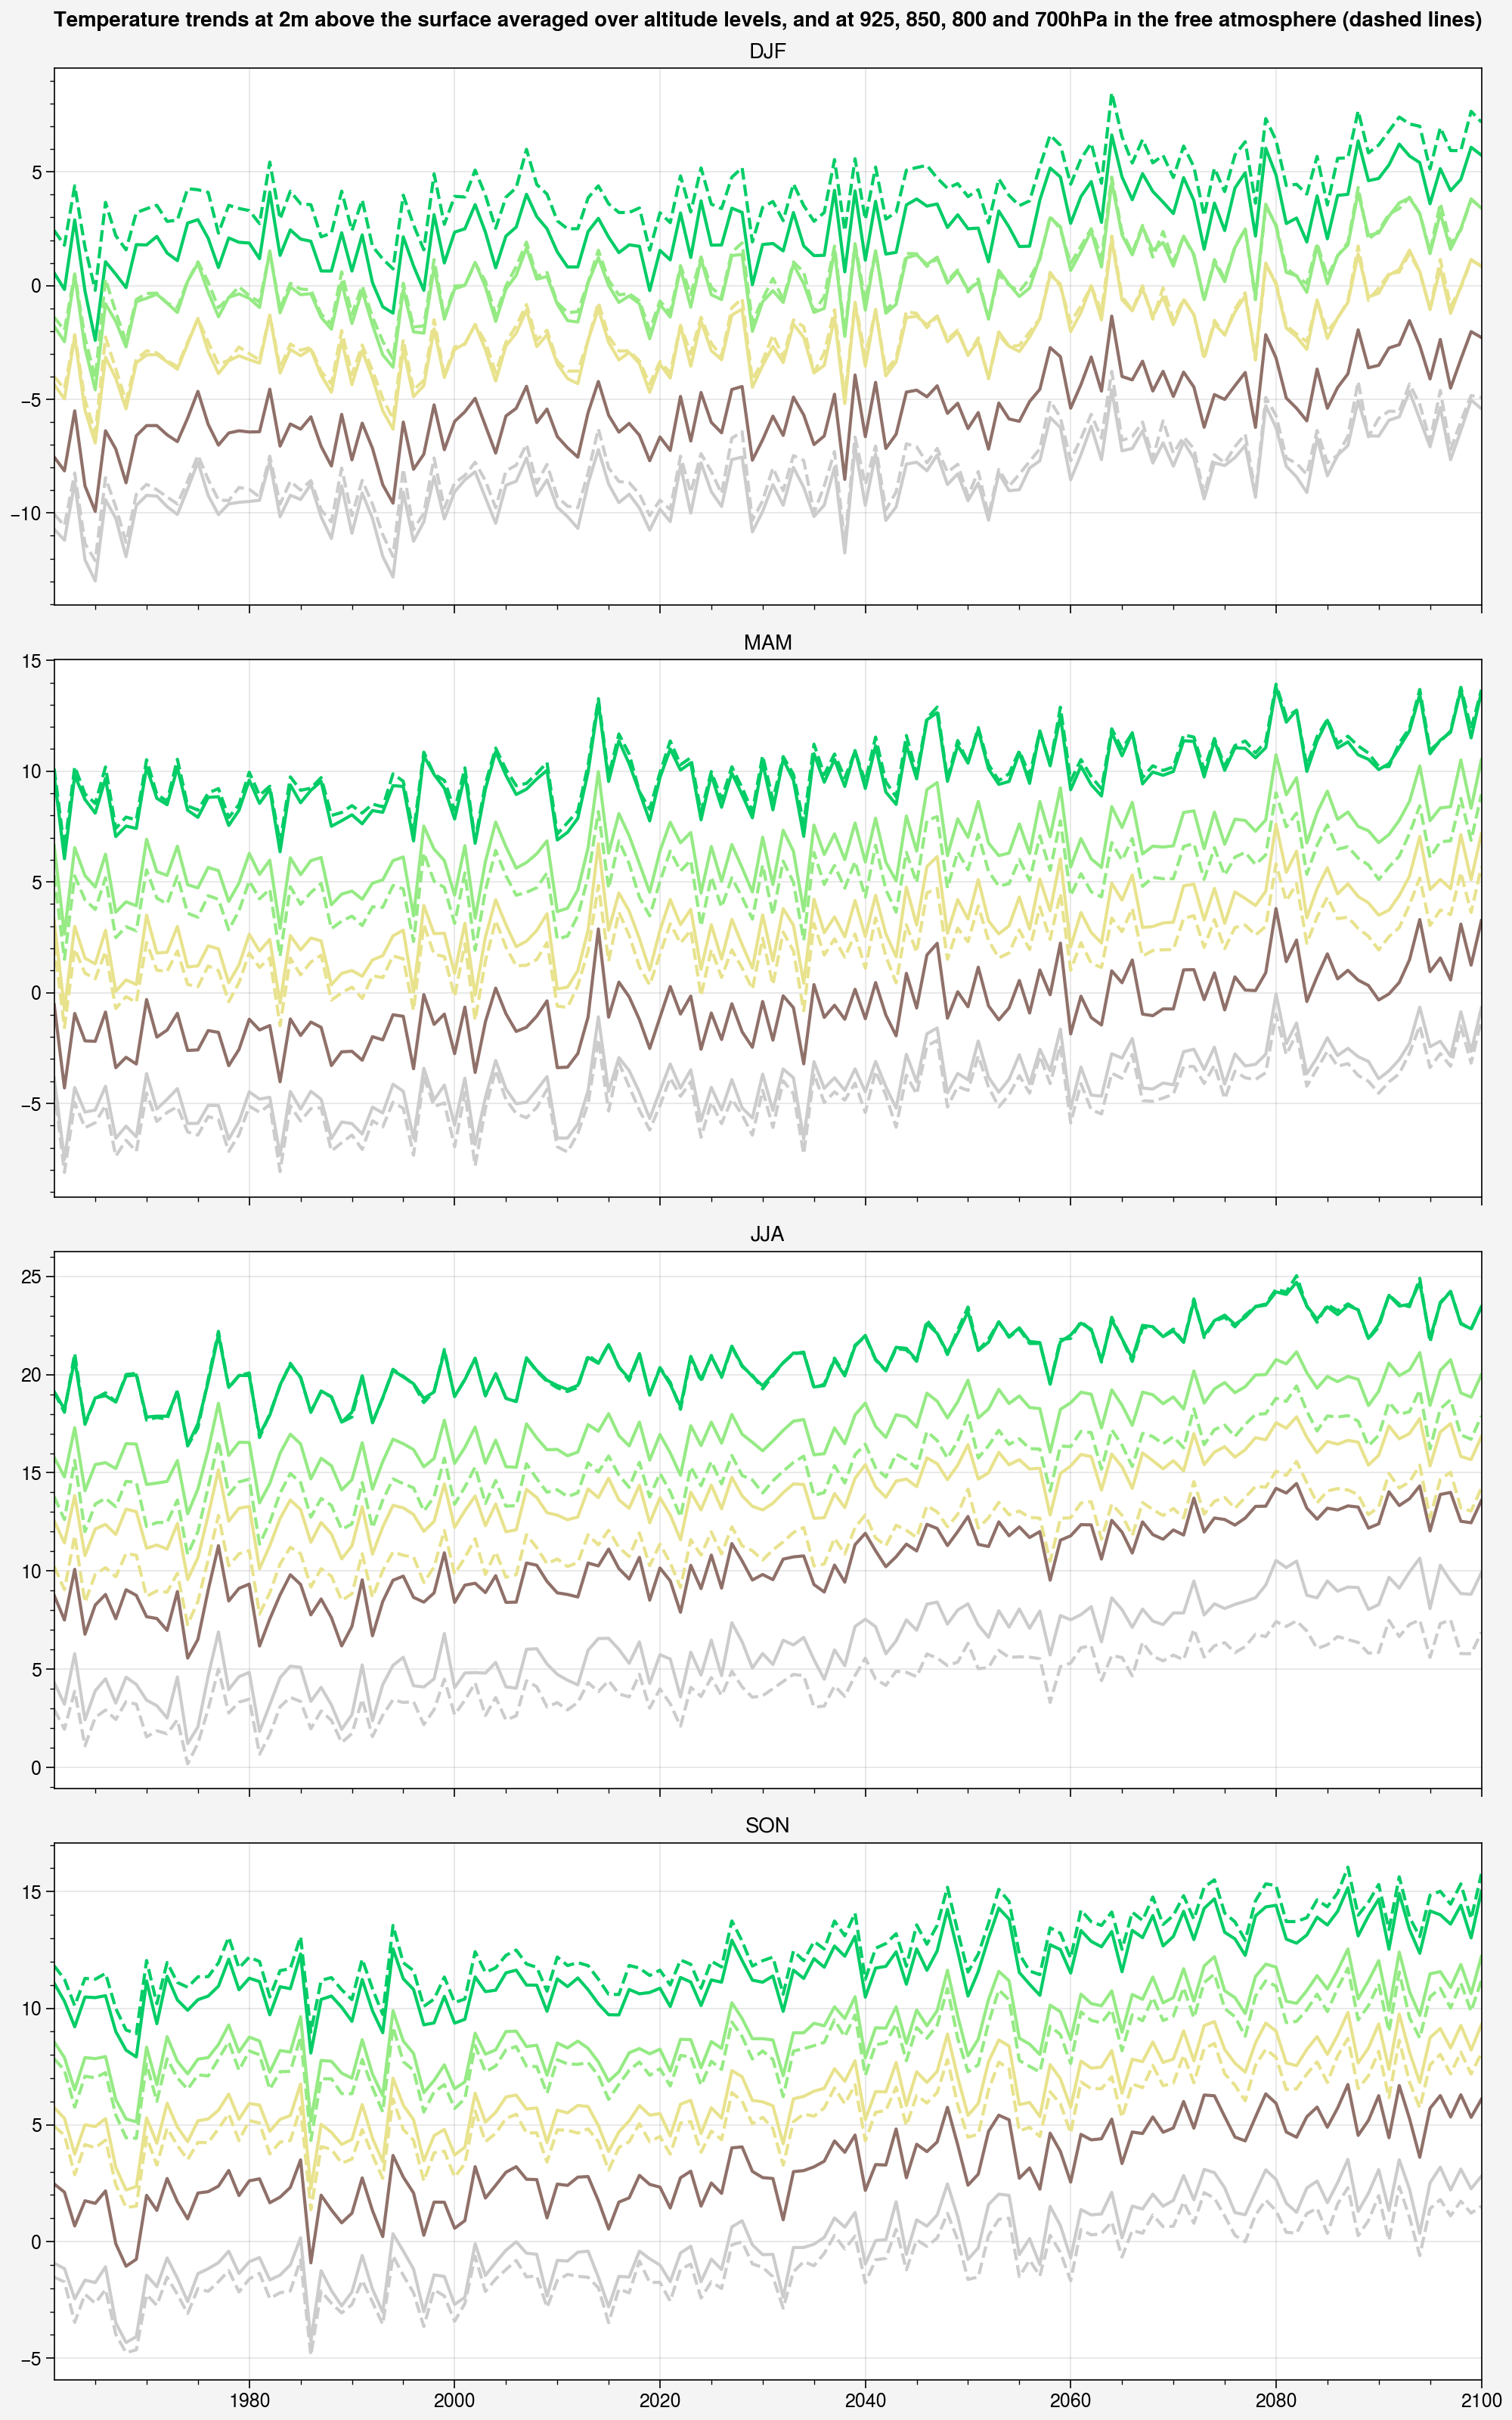

In [25]:
f,axs = pplt.subplots(nrows=4,figsize=(10,16))

for season in range(4):
    for i in range(len(levels)-1):
        axs[season].plot(time,meanseason_meanT_levels[i][:,season],color=color_levels[i])
        
    axs[season].plot(np.arange(1961,2101),wp_meanseason_meanTTp_925_meanalps[:,season],label='925',color=color_levels[0],linestyle='--')
    axs[season].plot(np.arange(1961,2101),wp_meanseason_meanTTp_850_meanalps[:,season],label='850',color=color_levels[1],linestyle='--')
    axs[season].plot(np.arange(1961,2101),wp_meanseason_meanTTp_800_meanalps[:,season],label='800',color=color_levels[2],linestyle='--')
    axs[season].plot(np.arange(1961,2101),wp_meanseason_meanTTp_700_meanalps[:,season],label='700',color=color_levels[4],linestyle='--')
    #axs[season].plot(np.arange(1961,2101),wp_meanseason_meanTTp_600_meanalps[:,season],label='600')

        
    axs[season].set_title(seasons[season])

axs.format(suptitle=
           "Temperature trends at 2m above the surface averaged over altitude levels, and at 925, 850, 800 and 700hPa in the free atmosphere (dashed lines)")

Text(0, 0.5, 'T (°C)')

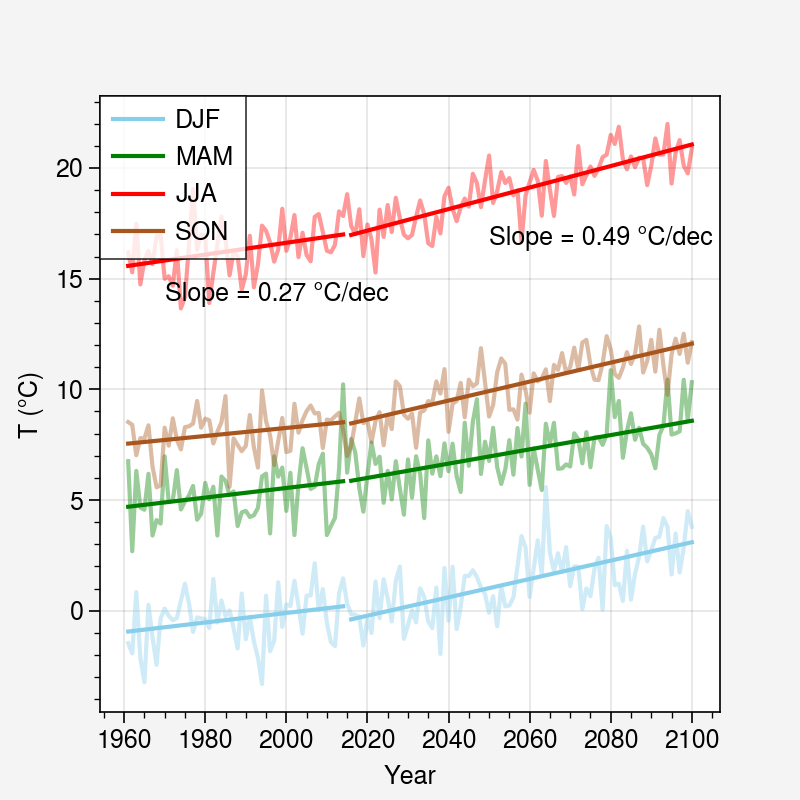

In [26]:
j=50
i=60

seas_names = ['DJF','MAM','JJA','SON']
season_col = ['skyblue','green','r','sienna']

for season in range(4):
    plt.plot(time,wp_meanseason_meanT[:,season,j,i],color=season_col[season],alpha=0.4)
    
    plt.plot(time[0:54],origin_T_hist[0,season,j,i] + slope_T_hist[0,season,j,i]*np.arange(0,54),color=season_col[season])
    plt.plot(time[55:],origin_T_fut[0,season,j,i] + slope_T_fut[0,season,j,i]*np.arange(0,85),color=season_col[season],label=seas_names[season])
    
    if season==2:
        plt.text(1970, 14, 'Slope = 0.27 °C/dec', fontsize=9)
        plt.text(2050, 16.5, 'Slope = 0.49 °C/dec', fontsize=9)

plt.legend()
plt.xlabel('Year')
plt.ylabel('T (°C)')

Text(0, 0.5, 'T (°C)')

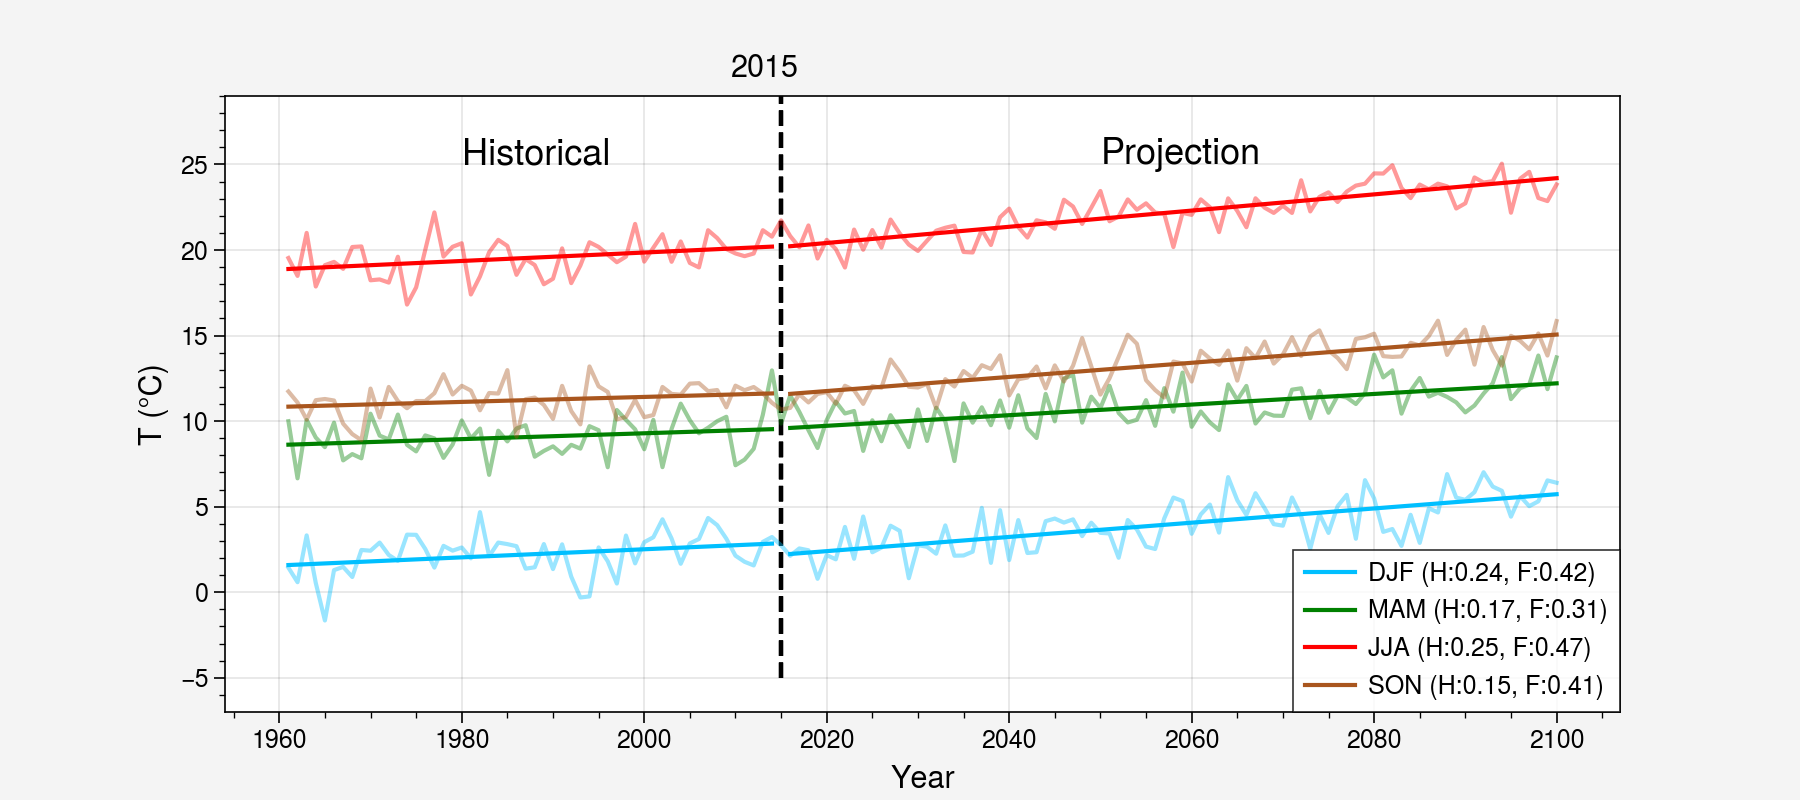

In [27]:
wp_meanseason_meanT_meanarea = wp_meanseason_meanT.mean(axis=(2,3))

origin_T_hist_meanarea = origin_T_hist.mean(axis=(2,3))
origin_T_fut_meanarea = origin_T_fut.mean(axis=(2,3))
slope_T_hist_meanarea = slope_T_hist.mean(axis=(2,3))
slope_T_fut_meanarea = slope_T_fut.mean(axis=(2,3))

seas_names = ['DJF (H:0.24, F:0.42)','MAM (H:0.17, F:0.31)','JJA (H:0.25, F:0.47)','SON (H:0.15, F:0.41)']
season_col = ['deepskyblue','green','r','sienna']

f,ax=plt.subplots(figsize=(9, 4))

for season in range(4):
    ax.plot(time,wp_meanseason_meanT_meanarea[:,season],color=season_col[season],alpha=0.4)
    ax.vlines(2015,-5,30,'k','--')
    ax.set_ylim([-7,29])
    plt.plot(time[0:54],origin_T_hist_meanarea[0,season] + slope_T_hist_meanarea[0,season]*np.arange(0,54),color=season_col[season])
    plt.plot(time[55:],origin_T_fut_meanarea[0,season] + slope_T_fut_meanarea[0,season]*np.arange(0,85),color=season_col[season],label=seas_names[season])

    
    if season==2:
        plt.text(1980, 25, 'Historical', fontsize=13)
        plt.text(2050, 25, 'Projection', fontsize=13)
        plt.text(2009.5,30.1,'2015',fontsize=11)

ax.legend(loc='lower right')
ax.set_xlabel('Year',fontsize=11)
ax.set_ylabel('T (°C)',fontsize=11)

In [28]:
print(slope_T_hist_meanarea[0])
print(slope_T_fut_meanarea[0])

[0.02362815 0.0170755  0.0246491  0.01456497]
[0.0415895  0.03103614 0.04734204 0.04126267]


In [29]:
origin_T_hist.shape

(3, 4, 91, 139)

0.024539163419938708
0.04245194503687635
0.01900546702306948
0.031938649833601715
0.025521666458569573
0.04830100356384749
0.015758425634885116
0.04286181448808484


Text(0, 0.5, 'T (°C)')

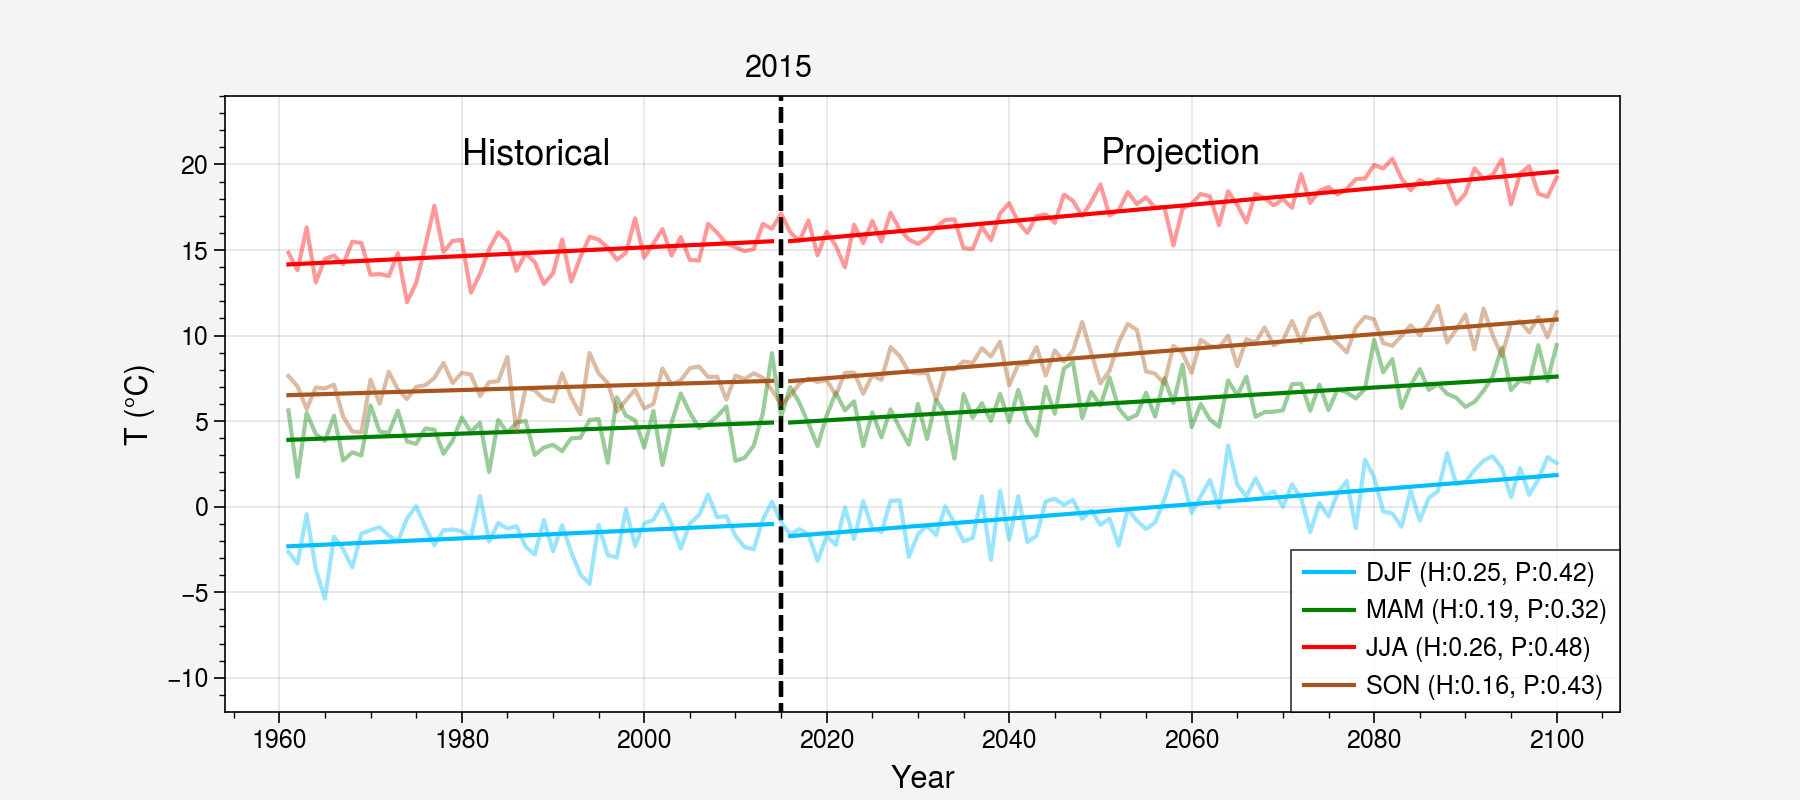

In [31]:
wp_meanseason_meanT_alps = np.ma.masked_array(wp_meanseason_meanT, mask=np.invert(alps_wp))
wp_meanseason_meanT_alps_meanarea = wp_meanseason_meanT_alps.mean(axis=(2,3))


#origin_T_hist_meanarea = origin_T_hist.mean(axis=(2,3))
#origin_T_fut_meanarea = origin_T_fut.mean(axis=(2,3))
#slope_T_hist_meanarea = slope_T_hist.mean(axis=(2,3))
#slope_T_fut_meanarea = slope_T_fut.mean(axis=(2,3))

seas_names = ['DJF (H:0.25, P:0.42)','MAM (H:0.19, P:0.32)','JJA (H:0.26, P:0.48)','SON (H:0.16, P:0.43)']
season_col = ['deepskyblue','green','r','sienna']

f,ax=plt.subplots(figsize=(9, 4))

for season in range(4):
    ax.plot(time,wp_meanseason_meanT_alps_meanarea[:,season],color=season_col[season],alpha=0.4)
    ax.vlines(2015,-15,30,'k','--')
    ax.set_ylim([-12,24])

    origin_T_hist_seas_alps = np.ma.masked_array(origin_T_hist[0,season], mask=np.invert(alps))
    origin_T_fut_seas_alps = np.ma.masked_array(origin_T_fut[0,season], mask=np.invert(alps))
    slope_T_hist_seas_alps = np.ma.masked_array(slope_T_hist[0,season], mask=np.invert(alps))
    slope_T_fut_seas_alps = np.ma.masked_array(slope_T_fut[0,season], mask=np.invert(alps))
    plt.plot(time[0:54],origin_T_hist_seas_alps.mean() + slope_T_hist_seas_alps.mean()*np.arange(0,54),color=season_col[season])
    plt.plot(time[55:],origin_T_fut_seas_alps.mean() + slope_T_fut_seas_alps.mean()*np.arange(0,85),color=season_col[season],label=seas_names[season])

    print(slope_T_hist_seas_alps.mean())
    print(slope_T_fut_seas_alps.mean())
    
    if season==2:
        plt.text(1980, 20, 'Historical', fontsize=13)
        plt.text(2050, 20, 'Projection', fontsize=13)
        plt.text(2011,25.1,'2015',fontsize=11)

ax.legend(loc='lower right')
ax.set_xlabel('Year',fontsize=11)
ax.set_ylabel('T (°C)',fontsize=11)